In [64]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

train = pd.read_csv('E:\\train (1).csv')
test = pd.read_csv('E:\\test (1).csv')

train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

column_names = test.columns

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

train_dum = train.copy()
test_dum = test.copy()

a = ((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR)))

for i,j in zip(np.arange(len(train.median())),train.median()):
    (train_dum.ix[a.iloc[:,i],i]) = j

    
    
g1 = train.median().drop('medv')
 
    
min2 = (Q1 - 1.5 * IQR).drop('medv')
max2 = (Q3 + 1.5 * IQR).drop('medv')
   
for i,j in zip(np.arange(len(g1)),g1):
    
    test_dum.ix[(test_dum.iloc[:,i]>max2[i]) | (test_dum.iloc[:,i]<min2[i]),i] =j

train = train_dum.copy()
test = test_dum.copy()

train['income_cat'] = np.floor(train['lstat']/4.2)
train['income_cat'].where(train['income_cat']<5,5,inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["income_cat"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

train = strat_train_set.copy()


X_train = train.drop('medv',axis=1).copy()
y_train = train['medv'].copy()
X_test = strat_test_set.drop('medv',axis=1).copy()
y_test =strat_test_set['medv'].copy()


#scaling the terms
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
scale_y = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.transform(X_test)
y_train = scale_y.fit_transform(y_train.values.reshape(-1,1))
y_test = scale_y.transform(y_test.values.reshape(-1,1))


test = scale_x.transform(test)

y_train = y_train.ravel()
y_test = y_test.ravel()

X_train = pd.DataFrame(X_train,columns=column_names)
X_test = pd.DataFrame(X_test,columns=column_names)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred_1 = lin_reg.predict(X_train)
error_1 = np.sqrt(mean_squared_error(y_train,pred_1))
#error_1

rid_reg = Ridge(alpha=1,solver='cholesky')
rid_reg.fit(X_train,y_train)
pred_2 = rid_reg.predict(X_train)
error_2 = np.sqrt(mean_squared_error(y_train,pred_2))
#error_2

lass_reg = Lasso(alpha=0.1)
lass_reg.fit(X_train,y_train)
pred_3 = lass_reg.predict(X_train)
error_3 = np.sqrt(mean_squared_error(y_train,pred_3))
#error_3

sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X_train,y_train)
pred_4 = sgd_reg.predict(X_train)
error_4 = np.sqrt(mean_squared_error(y_train,pred_4))
#error_4

knr_reg = KNeighborsRegressor(n_neighbors=3)
knr_reg.fit(X_train,y_train)
pred_5 = knr_reg.predict(X_train)
error_5 = np.sqrt(mean_squared_error(y_train,pred_5))
#error_5

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train,y_train)
pred_6 = svr_reg.predict(X_train)
error_6 = np.sqrt(mean_squared_error(y_train,pred_6))
#error_6

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)
pred_7 = tree_reg.predict(X_train)
error_7 = np.sqrt(mean_squared_error(y_train,pred_7))
#error_7

forest_reg = RandomForestRegressor(random_state=42,n_jobs=-1,oob_score=True)
forest_reg.fit(X_train,y_train)
pred_8 = forest_reg.predict(X_train)
error_8 = np.sqrt(mean_squared_error(y_train,pred_8))
#error_8

elasic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elasic_reg.fit(X_train,y_train)
pred_9 = elasic_reg.predict(X_train)
error_9 = np.sqrt(mean_squared_error(y_train,pred_9))
#error_9

svr_reg_2 = SVR(kernel='sigmoid')
svr_reg_2.fit(X_train,y_train)
pred_10 = svr_reg_2.predict(X_train)
error_10 = np.sqrt(mean_squared_error(y_train,pred_10))
#error_10

svr_reg_3 = SVR(kernel='poly',degree=2)
svr_reg_3.fit(X_train,y_train)
pred_11 = svr_reg_3.predict(X_train)
error_11 = np.sqrt(mean_squared_error(y_train,pred_11))
#error_11

svr_reg_4 = SVR(kernel='poly',degree=3)
svr_reg_4.fit(X_train,y_train)
pred_12 = svr_reg_3.predict(X_train)
error_12 = np.sqrt(mean_squared_error(y_train,pred_12))
#error_12



results = pd.DataFrame([error_1,error_2,error_3,error_4,error_5,error_6,error_7,error_8,error_9,error_10,error_11,error_12],
                       index=['LinearRegression','Ridge','Lasso','SGDRegressor','KNeighborsRegressor','SVR','DecisionTreeRegressor',
                              'RandomForestRegressor','ElasticNet','sigmoid','poly_degree1','poly_degree2'],
                       columns=['mean_squared_error'])
results = results['mean_squared_error'].sort_values()
results = round(results,4)
results


DecisionTreeRegressor    0.0000
RandomForestRegressor    0.2421
KNeighborsRegressor      0.4559
SVR                      0.4628
LinearRegression         0.6050
Ridge                    0.6050
ElasticNet               0.6212
Lasso                    0.6324
SGDRegressor             0.6504
poly_degree1             0.6534
poly_degree2             0.6534
sigmoid                  1.6579
Name: mean_squared_error, dtype: float64

In [65]:
"""def display_scores(p):
    print(p.mean())
    print(p.std())"""

from sklearn.model_selection import cross_val_score

scores_1 = cross_val_score(tree_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
tree_scores = np.sqrt(-scores_1)
#display_scores(tree_scores)

scores_2 = cross_val_score(forest_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
forest_scores = np.sqrt(-scores_2)
#display_scores(forest_scores)

scores_3 = cross_val_score(knr_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
knr_scores = np.sqrt(-scores_3)
#display_scores(knr_scores)

scores_4 = cross_val_score(svr_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
svr_scores = np.sqrt(-scores_4)
#display_scores(svr_scores)

scores_5 = cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
lin_scores = np.sqrt(-scores_5)
#display_scores(svr_scores)

a = []
b = []

for i in [tree_scores,forest_scores,knr_scores,svr_scores,lin_scores]:
    a.append(i.mean())
    b.append(i.std())

a = np.array(a)
b = np.array(b)

df = pd.DataFrame([a,b,results[:5].values]).T
df.columns = ['mean_of_cross_val','std_of_cross_val','model_without_cross_val']
df.index = results[:5].index

print(df)

                       mean_of_cross_val  std_of_cross_val  \
DecisionTreeRegressor           0.765514          0.129885   
RandomForestRegressor           0.621376          0.107011   
KNeighborsRegressor             0.664229          0.129952   
SVR                             0.565932          0.102069   
LinearRegression                0.641269          0.091673   

                       model_without_cross_val  
DecisionTreeRegressor                   0.0000  
RandomForestRegressor                   0.2421  
KNeighborsRegressor                     0.4559  
SVR                                     0.4628  
LinearRegression                        0.6050  


In [66]:
#shortlist random knr linear
import statsmodels.formula.api as sm
X = np.append(np.ones((X_train.shape[0],1)),X_train,axis=1)
np.arange(X.shape[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [67]:
X_opt = X[:,[1,6, 7,  8,  10, 11,  13]].copy()
regressor_OLS = sm.OLS(endog= y_train,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     62.95
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           2.43e-52
Time:                        16:13:55   Log-Likelihood:                -245.27
No. Observations:                 266   AIC:                             504.5
Df Residuals:                     259   BIC:                             529.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0888      0.045      1.960      0.051      -0.000       0.178
x2             0.2686      0.044      6.098      0.000       0.182       0.355
x3            -0.2332      0.061     -3.818      0.000      -0.354      -0.113
x4            -0.0777      0.059     -1.320      0.188      -0.194       0.038
x5            -0.2784      0.057     -4.916      0.000      -0.390      -0.167
x6            -0.0875      0.042     -2.063      0.040      -0.171      -0.004
x7            -0.3139      0.054     -5.854      0.000      -0.420      -0.208
==============================================================================
Omnibus:                        8.985   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.733
Skew:                           0.347   Prob(JB):                      0.00770
Kurtosis:                       3.630   Cond. No.                         3.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
np.array([1,6, 7,  8,  10, 11,  13])-1

array([ 0,  5,  6,  7,  9, 10, 12])

In [69]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train)
pred_11 = lin_reg_1.predict(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]])
error_11 = np.sqrt(mean_squared_error(y_train,pred_11))


forest_reg_11 = RandomForestRegressor(random_state=42,n_jobs=-1,oob_score=True)
forest_reg_11.fit(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train)
pred_88 = forest_reg_11.predict(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]])
error_88 = np.sqrt(mean_squared_error(y_train,pred_88))




knr_reg_22 = SVR(kernel='rbf')
knr_reg_22.fit(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train)
pred_101 = knr_reg_22.predict(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]])
error_101 = np.sqrt(mean_squared_error(y_train,pred_101))


results = pd.DataFrame([error_11,error_101,error_88],
                       index=['LinearRegression','SVR','RandomForestRegressor'],
                       columns=['mean_squared_error'])
results = results['mean_squared_error'].sort_values()
results = round(results,4)
results

RandomForestRegressor    0.2505
SVR                      0.4737
LinearRegression         0.6084
Name: mean_squared_error, dtype: float64

In [70]:

scores_2 = cross_val_score(forest_reg_11,X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
forest_scores = np.sqrt(-scores_2)
#display_scores(forest_scores)

scores_3 = cross_val_score(knr_reg_22,X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train,scoring='neg_mean_squared_error',cv=10)
knr_scores = np.sqrt(-scores_3)
#display_scores(knr_scores)

scores_5 = cross_val_score(lin_reg_1,X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]],y_train,scoring='neg_mean_squared_error',cv=10)
lin_scores = np.sqrt(-scores_5)
#display_scores(svr_scores)

a = []
b = []

for i in [knr_scores,forest_scores,lin_scores]:
    a.append(i.mean())
    b.append(i.std())

a = np.array(a)
b = np.array(b)

df = pd.DataFrame([a,b]).T
df.columns = ['mean_of_cross_val','std_of_cross_val']
df.index = ['svr','forest','linear']

print(df)

        mean_of_cross_val  std_of_cross_val
svr              0.562255          0.102587
forest           0.639002          0.078580
linear           0.629795          0.087501


In [ ]:
#since in above thing svr has the lowest mean of cross val go for it

In [77]:
#no point in going for random forest since the score is high for that in cross val score
#instead go for svr and then linear

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.2,0.5,1,1.4],
             'gamma':[0.1,0.3,0.2,0.4,0.6,0.8,1],
             'tol':[1e-3,10e-3],
             'max_iter':[5,10,-1]}
forest_reg_2 = SVR(kernel='rbf')
grid_search = GridSearchCV(forest_reg_2,param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train.iloc[:,[ 0,5,  6,  7,   9, 10, 12]],y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.2, 0.5, 1, 1.4], 'gamma': [0.1, 0.3, 0.2, 0.4, 0.6, 0.8, 1], 'tol': [0.001, 0.01], 'max_iter': [5, 10, -1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [81]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'max_iter': -1, 'tol': 0.001}

In [82]:
cvres = grid_search.cv_results_
np.sqrt(-cvres['mean_test_score']).min()


0.5769489153226424

In [85]:
#since the above thing increased so go with the normal thing

In [86]:
y_pred = knr_reg_22.predict(X_test.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]])
error_11 = np.sqrt(mean_squared_error(y_test,y_pred))
error_11

0.3941594733733045

In [87]:
scale_y.inverse_transform(y_pred)

array([24.30936809, 15.97499658, 16.90316518, 28.59839239, 14.32742019,
       19.1464854 , 16.2310928 , 19.7264769 , 20.9671207 , 19.40026113,
       31.00808408, 21.89010564, 21.272048  , 19.70923314, 16.22917379,
       16.55012939, 31.68735126, 15.24661395, 13.40630548, 23.89192688,
       29.51957887, 20.91274477, 16.52112231, 18.6432327 , 25.07919664,
       25.9125692 , 19.19470352, 20.21318981, 20.11944989, 21.00501143,
       24.88406671, 23.35288405, 23.98888145, 18.31906915, 23.77271678,
       26.62013657, 30.39320905, 31.31719967, 25.05284828, 12.26243104,
       25.84184042, 27.75035444, 21.01502367, 22.80931517, 15.63555048,
       11.81550108, 14.31338206, 21.68512076, 22.38933687, 12.83104232,
       20.11955823, 19.04871828, 23.7572698 , 14.30460521, 19.54935024,
       17.61681773, 19.15744048, 26.9682247 , 10.9754596 , 21.76319134,
       25.41566701, 22.16724952, 22.85984431, 13.86191027, 28.63655449,
       17.61485935, 19.53935348])

In [88]:
scale_y.inverse_transform(y_test)

array([23.6, 14.1, 21.9, 22. , 12.7, 21.6, 21.4, 20.2, 19.9, 19.4, 32.2,
       22.5, 21.6, 18.3, 21.6, 19.5, 36.4, 16.7, 11.5, 24.4, 35.1, 21.6,
       19.6, 15. , 25.2, 23.6, 20.4, 20.6, 21.7, 21.7, 24.8, 23.2, 23.1,
       19.5, 22.3, 27.1, 35.4, 31.2, 24.4, 17.2, 23.7, 31.6, 19.6, 22.2,
       15.2, 13.9, 13.6, 19.1, 22.8, 15.4, 19.3, 17.5, 22.3, 19.1, 19.5,
       15.7, 19.6, 23.9, 11.3, 24.3, 23.1, 21.2, 20.7, 15.2, 29.1, 20. ,
       19.8])

In [91]:
scale_y.inverse_transform(knr_reg_22.predict(test[:,[ 0,  5,  6,  7,  9, 10, 12]]))

array([31.50584882, 24.32926645, 18.62896147, 18.31492742, 18.93493037,
       17.04444489, 18.29611927, 15.14465154, 15.74930137, 15.43827392,
       18.31655579, 20.81896097, 15.02527395, 14.91986356, 19.95911255,
       20.26920702, 20.68625076, 30.77126086, 16.72371287, 28.19943701,
       20.06960156, 22.59552657, 20.26884204, 21.47009053, 21.05360268,
       20.24996967, 24.32812687, 24.13102455, 25.80918505, 27.36703794,
       21.15419216, 24.02853656, 30.39332877, 18.90851889, 16.69454724,
       21.99745572, 17.99611497, 17.76640823, 18.58841553, 20.74958349,
       15.63358276, 18.92944778, 19.13066142, 17.1339517 , 14.43215187,
       13.99685253, 14.9798657 , 18.26671564, 19.01257097, 18.2412754 ,
       22.02869255, 23.43770246, 22.59746073, 23.53123531, 19.51819612,
       23.09857264, 27.18188015, 22.32795352, 32.57146738, 32.00938266,
       30.55386685, 30.72492068, 18.95904407, 16.84163072, 17.74256029,
       21.33258298, 23.68567676, 25.15324255, 20.5213803 , 22.86

In [94]:
#visualizing the results
from sklearn.decomposition import PCA

In [99]:

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_train.iloc[:,[ 0,5,  6,  7,   9, 10, 12]])


In [100]:
pca.explained_variance_ratio_

array([0.46806876])

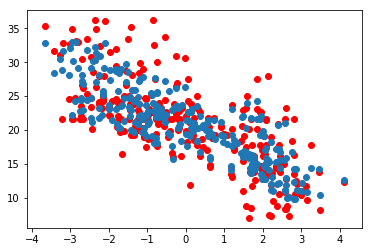

In [103]:
plt.scatter(principalComponents,scale_y.inverse_transform(y_train),c='r')
plt.scatter(principalComponents,scale_y.inverse_transform(knr_reg_22.predict(X_train.iloc[:,[ 0,  5,  6,  7,  9, 10, 12]])))

In [122]:
#most dependent feature is lstat but it has negative dependency
#second most dependent feature is tax it has negative dependency
#third most dependent feature is rm it has positive dependency
#fourth most dependent feature is age it has negative dependency